In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

### Cleaning housing data

In [3]:
housing = pd.read_csv('housing.csv')

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

There are missing values in `laundry_options`, `parking_options`, `description`, `lat`, `long`.

**Remove columns we are not going to use**

In [5]:
housing.drop(['url', 'region_url', 'image_url', 'description'], axis = 1, inplace = True)

**Remove missing values in `laundry_options`, `parking_options`, `lat`, `long`**

In [6]:
housing.dropna(axis = 0, inplace = True)

In [7]:
housing.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.359700e+05,2.359700e+05,2.359700e+05,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000,235970.000000
mean,7.041021e+09,1.351126e+04,1.105269e+03,1.927669,1.478785,0.779315,0.753151,0.642989,0.104157,0.017549,0.058219,37.891031,-94.220101
std,8.871302e+06,5.699286e+06,2.436786e+04,3.901174,0.628180,0.414709,0.431179,0.479119,0.305465,0.131305,0.234158,5.633149,16.975120
min,7.004032e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035925e+09,8.190000e+02,7.500000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.963100,-105.070000
50%,7.043394e+09,1.059000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.594300,-89.401500
75%,7.048516e+09,1.464000e+03,1.154000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.736300,-81.569100
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,172.633000


**Drop rows with price below 500**

According to data, the lowest average house rent in the US is about $550. So we decided to remove rows with price less than 500.

In [8]:
housing.drop(housing[housing.price <= 500].index, inplace = True)

**Drop rows with squarefeet less than 100 squarefeet**

In [9]:
housing.drop(housing[housing.sqfeet <= 100].index, inplace = True)

**Drop rows with number of bedrooms more than 10.**


In [10]:
housing.drop(housing[housing.beds >= 10].index, inplace = True)

**The distribution of housing price**

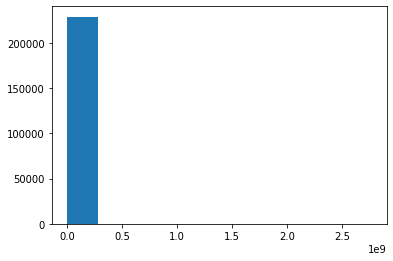

In [11]:
plt.hist(housing['price'])
plt.show()

There seems to be extreme value in the housing price.

**Drop the rows with house price larger than 3*IQR**

In [12]:
housing.drop(housing[housing.price >= 3*(1464-819)].index, inplace = True)

**The distribution of square feet**

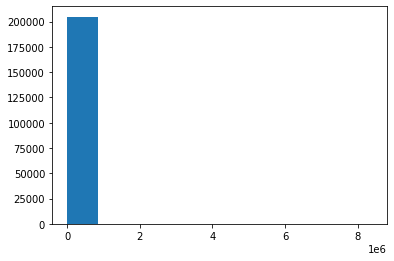

In [13]:
plt.hist(housing['sqfeet'])
plt.show()

There are also extreme values in squarefeet of houses.

**Drop the rows with exteremely large house, larger than 3*IQR**

In [14]:
housing.drop(housing[housing.sqfeet >= 3*(1154-750)].index, inplace = True)

In [15]:
housing.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,1.693750e+05,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000,169375.000000
mean,7.041057e+09,1045.667991,857.941137,1.657128,1.316257,0.817523,0.779973,0.671604,0.094205,0.011844,0.042781,37.979271,-93.701362
std,8.770179e+06,327.443256,198.915072,0.689577,0.467150,0.386238,0.414265,0.469631,0.292115,0.108182,0.202363,5.578837,16.347669
min,7.004032e+09,501.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.955800,-163.894000
25%,7.035963e+09,795.000000,714.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.976100,-102.394000
50%,7.043406e+09,975.000000,870.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.751300,-89.215800
75%,7.048472e+09,1265.000000,1000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.759100,-81.733900
max,7.051291e+09,1934.000000,1211.000000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,94.124800


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169375 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       169375 non-null  int64  
 1   region                   169375 non-null  object 
 2   price                    169375 non-null  int64  
 3   type                     169375 non-null  object 
 4   sqfeet                   169375 non-null  int64  
 5   beds                     169375 non-null  int64  
 6   baths                    169375 non-null  float64
 7   cats_allowed             169375 non-null  int64  
 8   dogs_allowed             169375 non-null  int64  
 9   smoking_allowed          169375 non-null  int64  
 10  wheelchair_access        169375 non-null  int64  
 11  electric_vehicle_charge  169375 non-null  int64  
 12  comes_furnished          169375 non-null  int64  
 13  laundry_options          169375 non-null  object 
 14  park

**Change the value of `state` in to capital letters**

In [19]:
housing.state = housing.state.str.upper()

**Add a column of state average housing rent**

In [41]:
average_price_of_state = pd.DataFrame(housing.groupby('state')['price'].mean())
average_price_of_state.reset_index(inplace = True)
average_price_of_state.columns = ['state', 'state_average']

In [42]:
average_price_of_state

,state,state_average
0,AK,1087.236677
1,AL,844.324815
2,AR,803.607172
3,AZ,991.330751
4,CA,1389.820213
5,CO,1326.027707
6,CT,1204.778980
7,DC,1563.984694
8,DE,1202.057971
9,FL,1118.306122


In [45]:
housing = housing.merge(average_price_of_state, left_on='state', right_on='state')

**Output the cleaned housing data**

In [46]:
housing.to_csv('cleaned_housing.csv')

**Distributions of price and squarefeet after removing outliers**

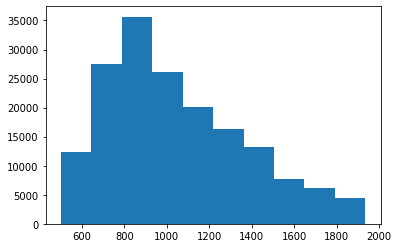

In [ ]:
plt.hist(housing['price'])
plt.show()

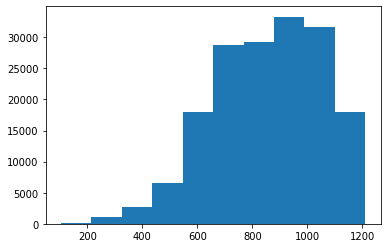

In [ ]:
plt.hist(housing['sqfeet'])
plt.show()

**box plot of discrete variables vs price**

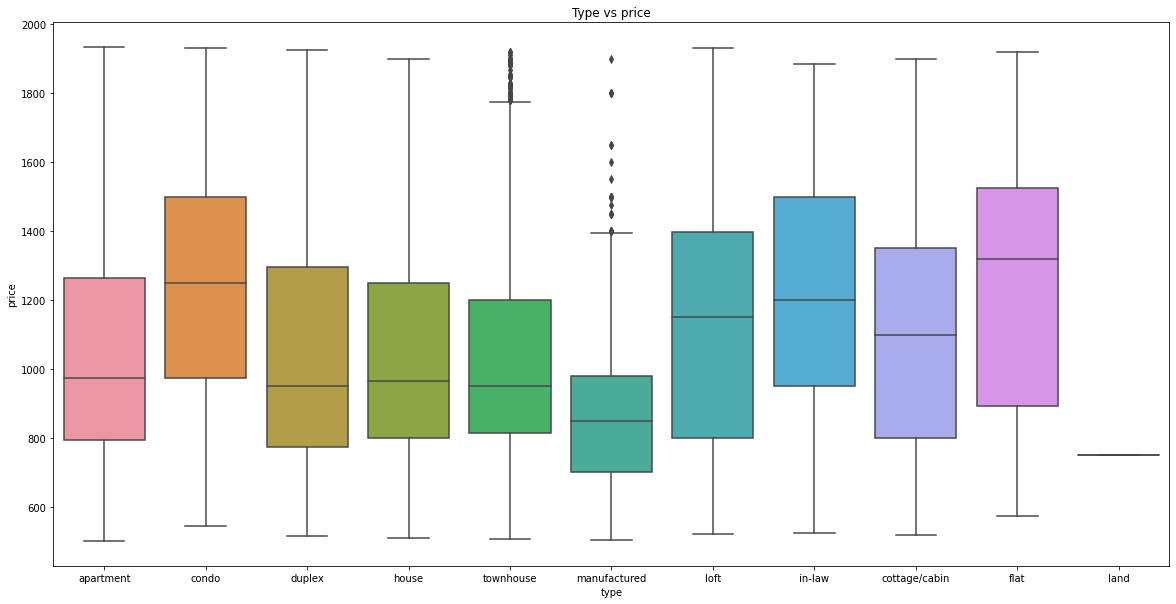

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='type', y='price', data=housing)
plt.title("Type vs price")
plt.show()

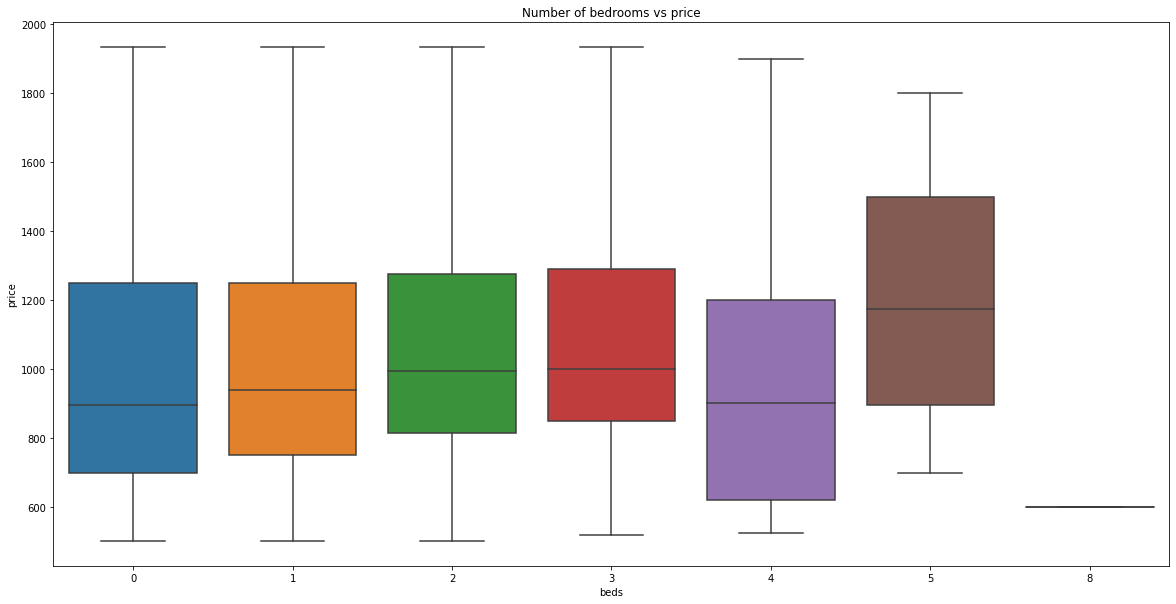

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='beds', y='price', data=housing)
plt.title("Number of bedrooms vs price")
plt.show()

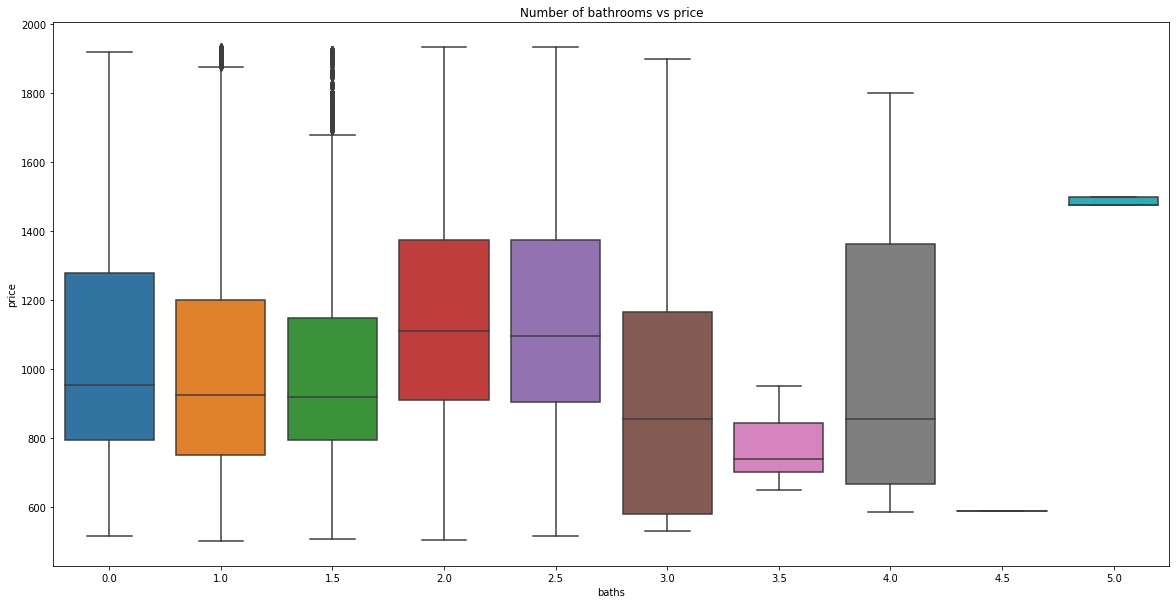

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='baths', y='price', data=housing)
plt.title("Number of bathrooms vs price")
plt.show()

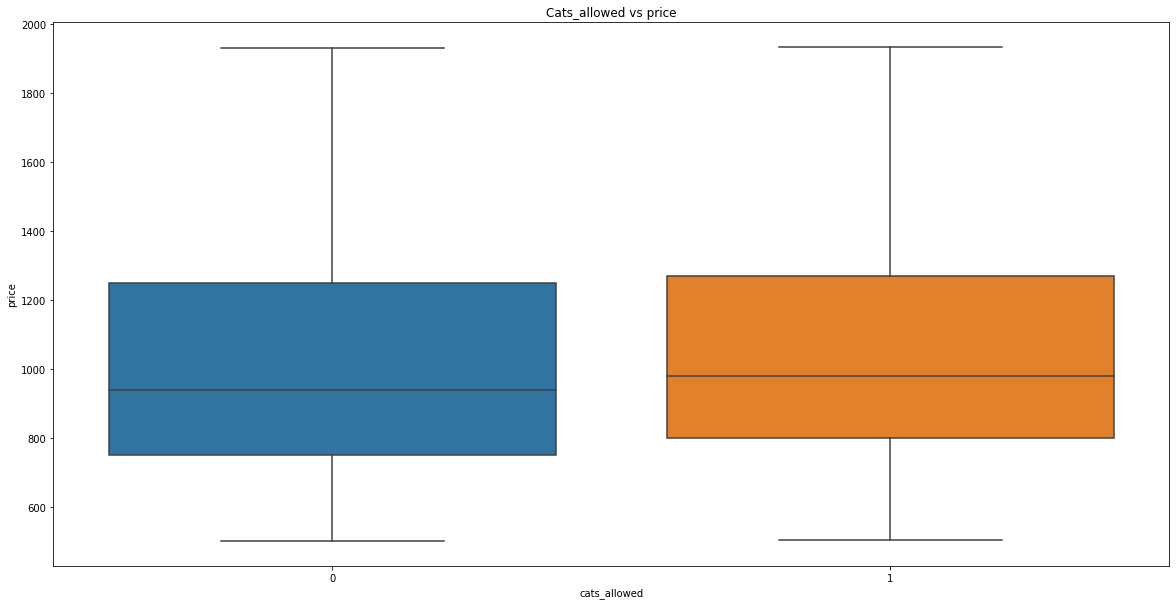

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='cats_allowed', y='price', data=housing)
plt.title("Cats_allowed vs price")
plt.show()

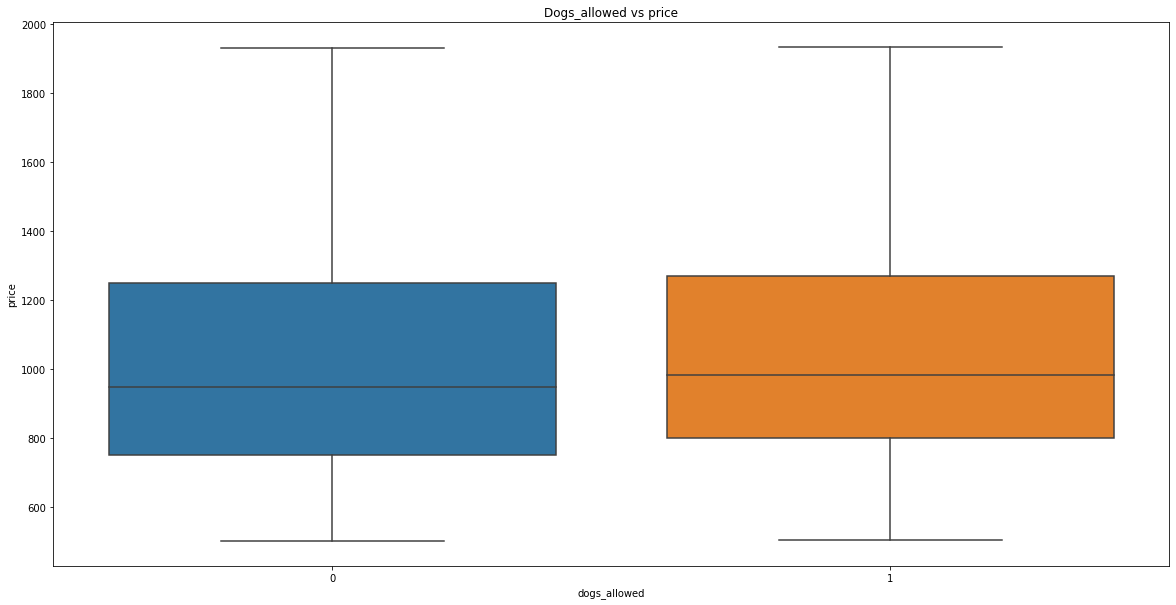

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='dogs_allowed', y='price', data=housing)
plt.title("Dogs_allowed vs price")
plt.show()

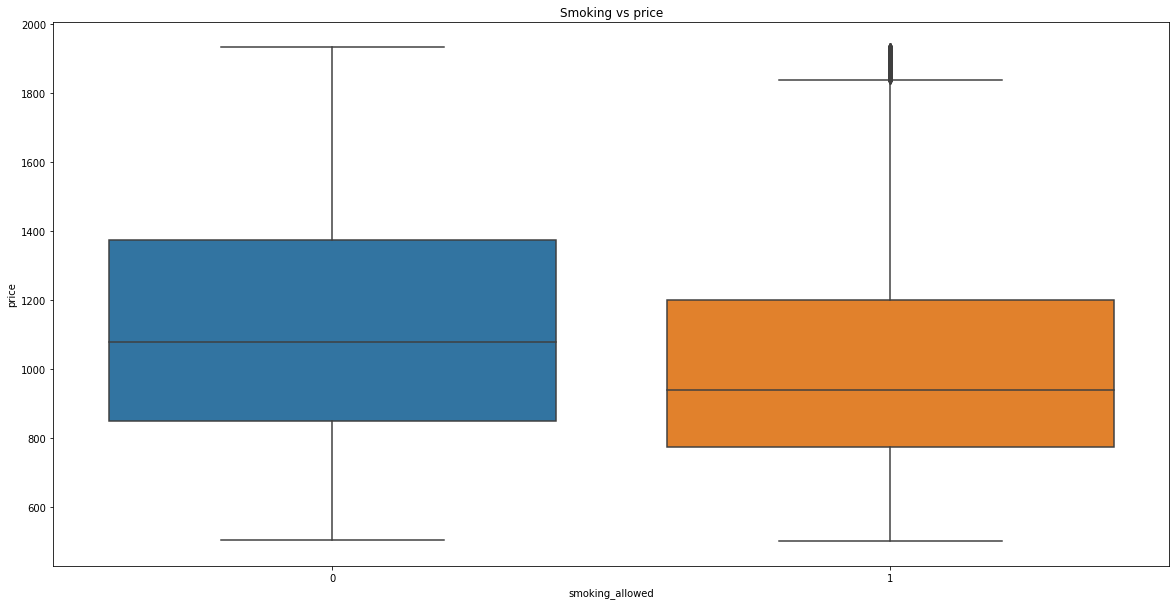

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='smoking_allowed', y='price', data=housing)
plt.title("Smoking vs price")
plt.show()

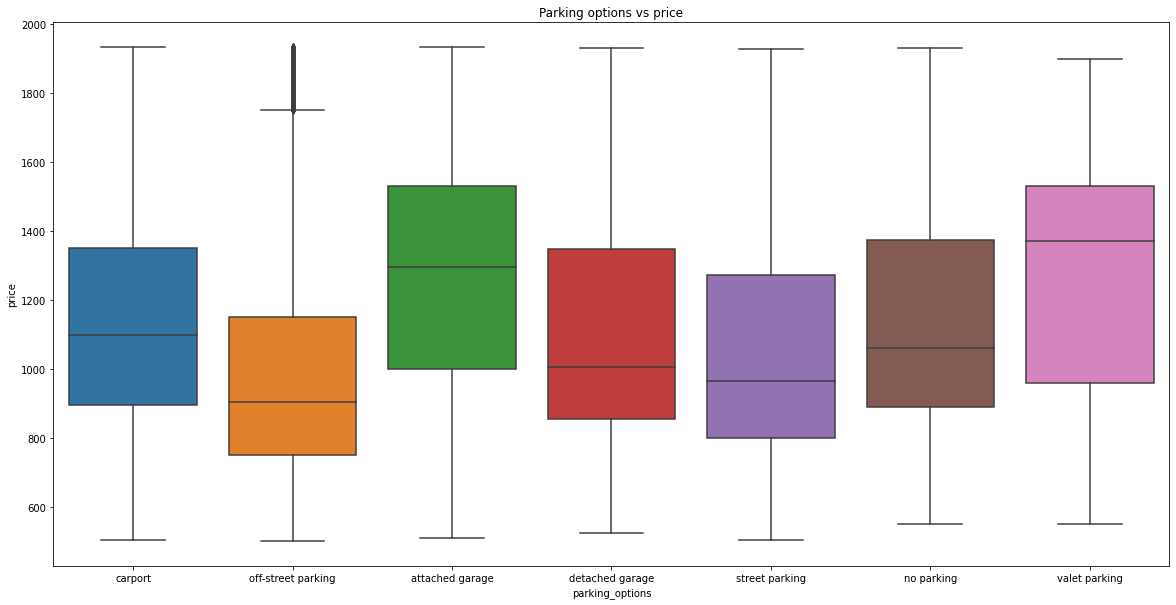

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='parking_options', y='price', data=housing)
plt.title("Parking options vs price")
plt.show()

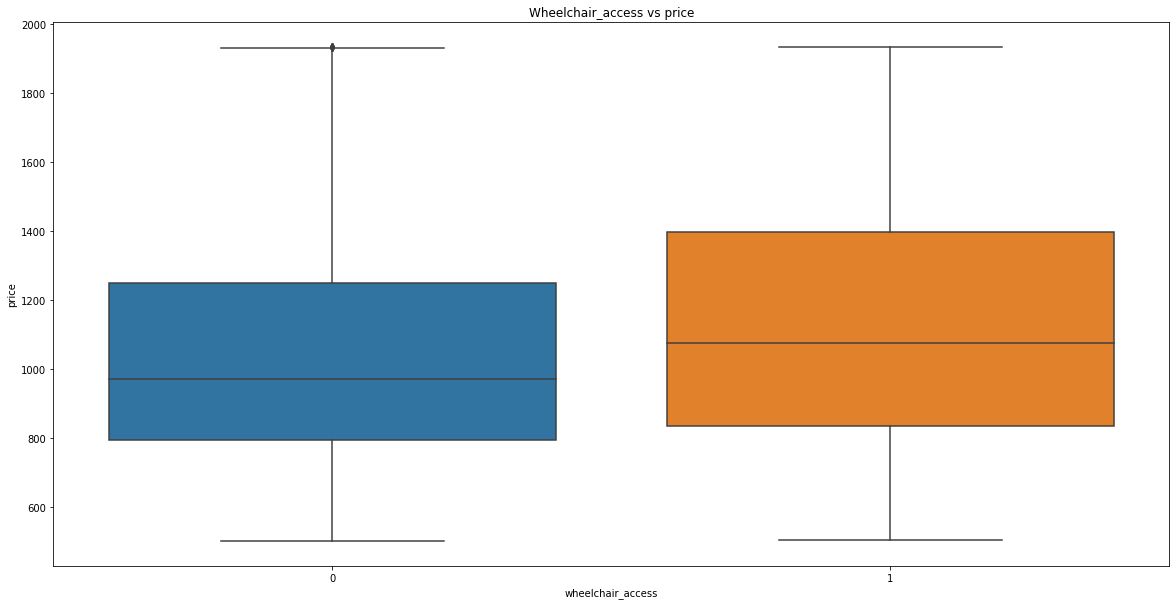

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='wheelchair_access', y='price', data=housing)
plt.title("Wheelchair_access vs price")
plt.show()

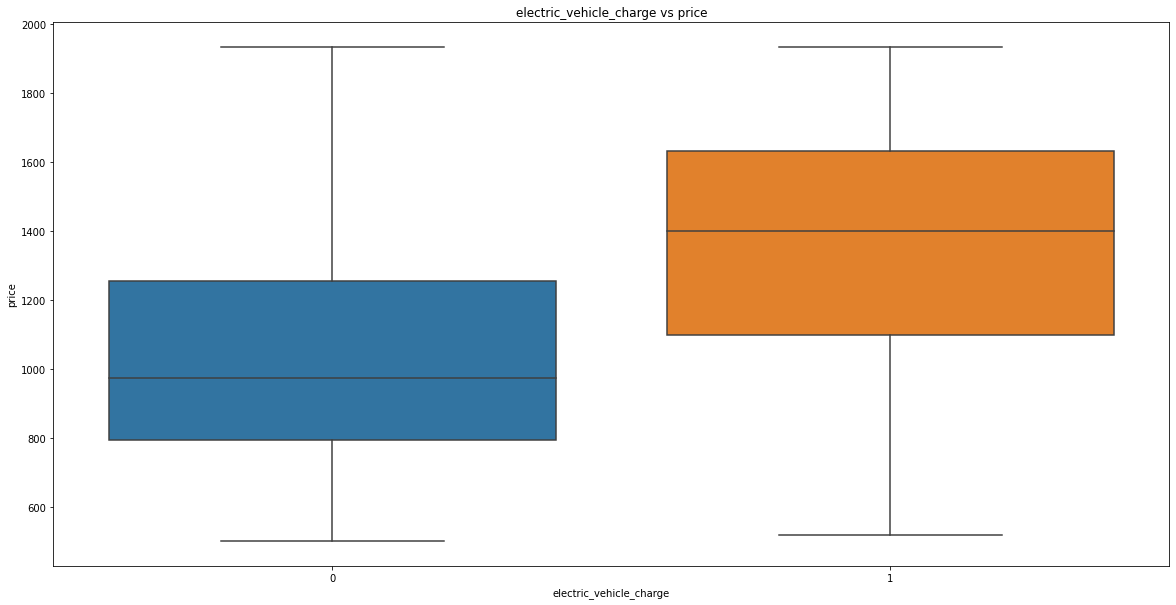

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='electric_vehicle_charge', y='price', data=housing)
plt.title("electric_vehicle_charge vs price")
plt.show()

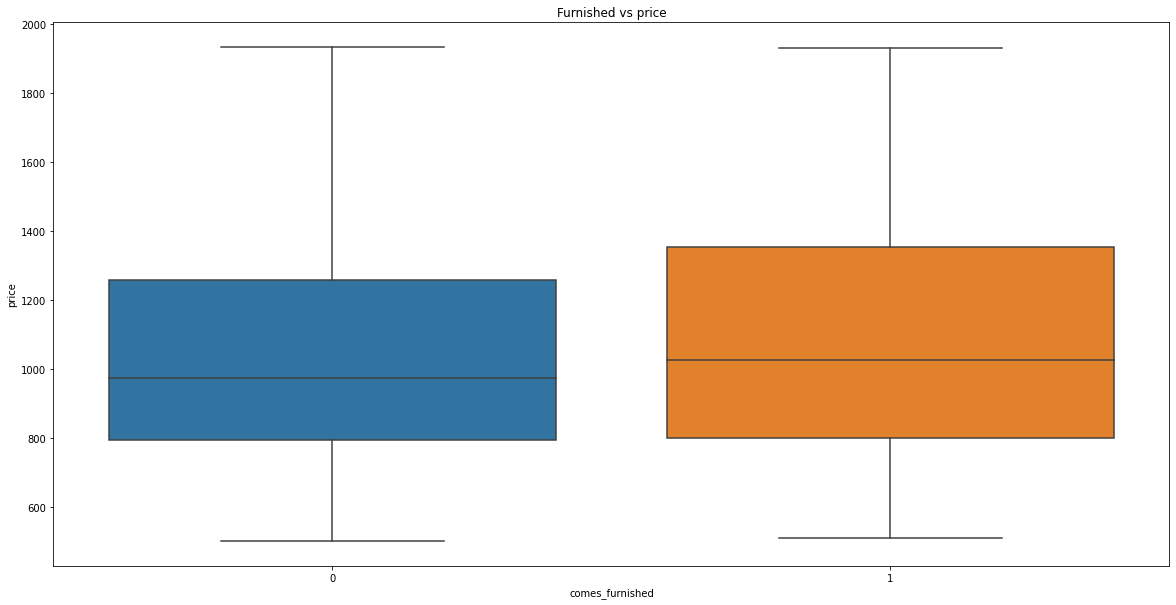

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='comes_furnished', y='price', data=housing)
plt.title("Furnished vs price")
plt.show()

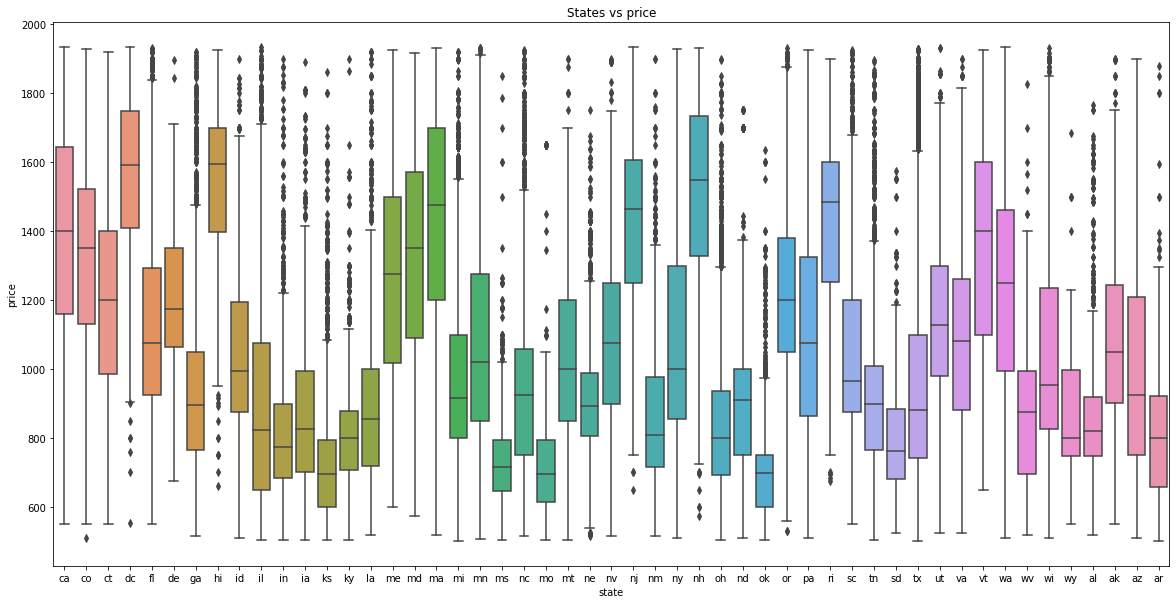

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='state', y='price', data=housing)
plt.title("States vs price")
plt.show()

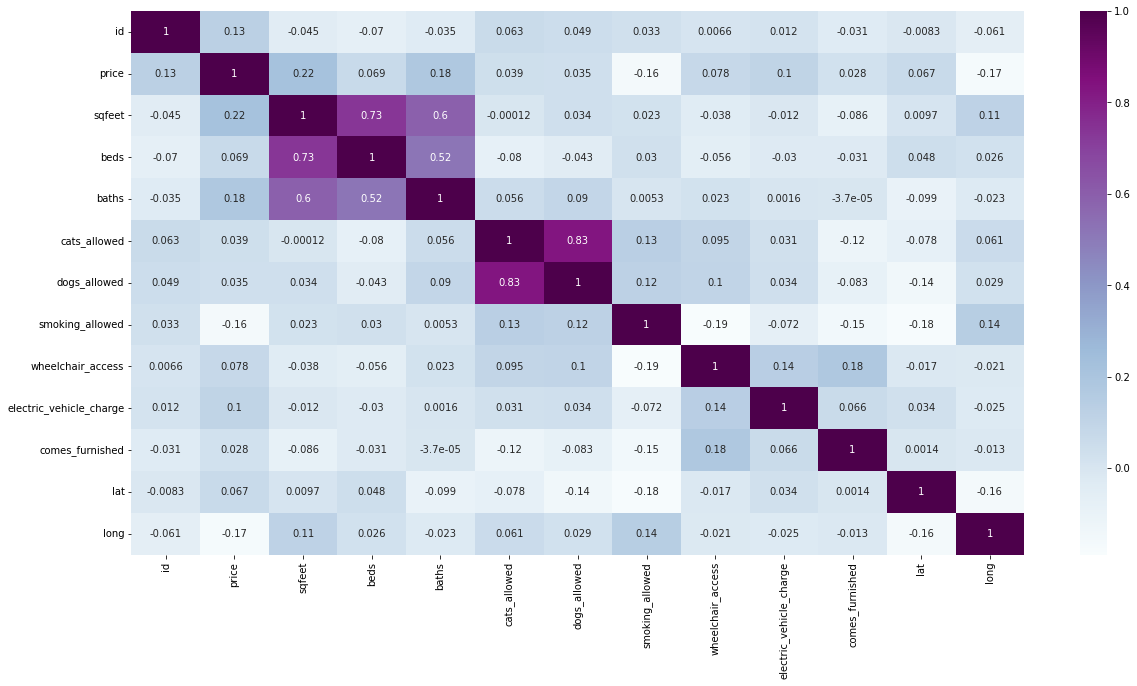

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(housing.corr(), annot=True, cmap="BuPu")
plt.show()

The correlation between each independent variable and price is quit low. There may be collinearity between `sqfeet` and `beds`, `sqfeet` and `baths`, `beds` and `bath`, `cats_allowed` and `dogs_allowed`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c62e4f61-5454-4e18-b0e0-542e6e7256b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>